In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
X, y = raw_data.data , raw_data.target

print(f"Any nans? {np.isnan(X).any()}")
X.shape, y.shape

Any nans? False


((569, 30), (569,))

## Train|test split

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## MLP NETWORK

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "input_layer"))
    model.add(Dense(32, name = "hidden1", activation = "relu"))# change to he initalizer
    model.add(Dense(32, name = "hidden2", activation = "relu"))
    model.add(Dense(1, name ="Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 32)                992       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(scaled_X_train, y_train, epochs= 500, validation_split=.2, verbose=1)

Train on 364 samples, validate on 91 samples
Epoch 1/500
364/364 [==============================] - 1s 1ms/sample - loss: 0.5995 - val_loss: 0.4899
Epoch 2/500
364/364 [==============================] - 0s 123us/sample - loss: 0.4223 - val_loss: 0.3551
Epoch 3/500
364/364 [==============================] - 0s 127us/sample - loss: 0.3051 - val_loss: 0.2673
Epoch 4/500
364/364 [==============================] - 0s 115us/sample - loss: 0.2305 - val_loss: 0.2118
Epoch 5/500
364/364 [==============================] - 0s 114us/sample - loss: 0.1812 - val_loss: 0.1727
Epoch 6/500
364/364 [==============================] - 0s 104us/sample - loss: 0.1463 - val_loss: 0.1493
Epoch 7/500
364/364 [==============================] - 0s 110us/sample - loss: 0.1235 - val_loss: 0.1343
Epoch 8/500
364/364 [==============================] - 0s 116us/sample - loss: 0.1063 - val_loss: 0.1233
Epoch 9/500
364/364 [==============================] - 0s 117us/sample - loss: 0.0940 - val_loss: 0.1152
Epoch 10/500

In [14]:
import pandas as pd

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.599532,0.489863
1,0.422254,0.355143
2,0.305104,0.267318
3,0.230452,0.211835
4,0.181234,0.172656


<AxesSubplot:>

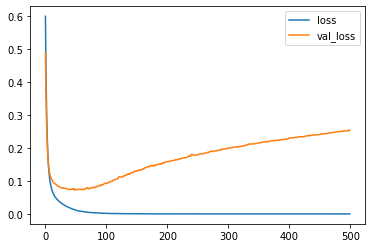

In [15]:
df_loss.plot()
#Clear overfitting as validation loss increases after a certain amount of epochs

## Early stopping

In [16]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 32)                992       
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(scaled_X_train, y_train, epochs=50, validation_split=.2, verbose=1)

Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 1s 2ms/sample - loss: 0.7138 - val_loss: 0.5985
Epoch 2/50
364/364 [==============================] - 0s 113us/sample - loss: 0.5294 - val_loss: 0.4666
Epoch 3/50
364/364 [==============================] - 0s 111us/sample - loss: 0.4123 - val_loss: 0.3712
Epoch 4/50
364/364 [==============================] - 0s 117us/sample - loss: 0.3235 - val_loss: 0.3010
Epoch 5/50
364/364 [==============================] - 0s 103us/sample - loss: 0.2577 - val_loss: 0.2511
Epoch 6/50
364/364 [==============================] - 0s 118us/sample - loss: 0.2118 - val_loss: 0.2168
Epoch 7/50
364/364 [==============================] - 0s 109us/sample - loss: 0.1773 - val_loss: 0.1934
Epoch 8/50
364/364 [==============================] - 0s 129us/sample - loss: 0.1525 - val_loss: 0.1758
Epoch 9/50
364/364 [==============================] - 0s 183us/sample - loss: 0.1329 - val_loss: 0.1630
Epoch 10/50
364/364 [

<AxesSubplot:>

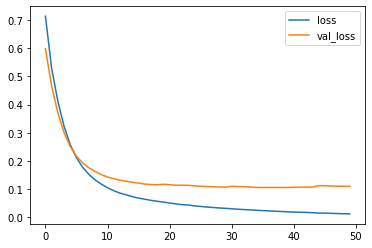

In [18]:
pd.DataFrame(model.history.history).plot()

In [19]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs=50, verbose=0)

## Prediction and evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)

In [22]:
y_pred = (y_pred > .5)*1

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



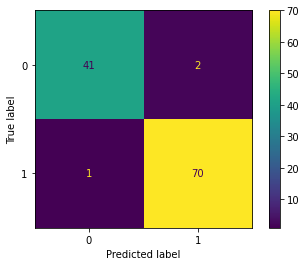

In [23]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))